In [6]:
import torch
import torch.nn as nn

# vgg16
16은 D, 19가 E모델이다.

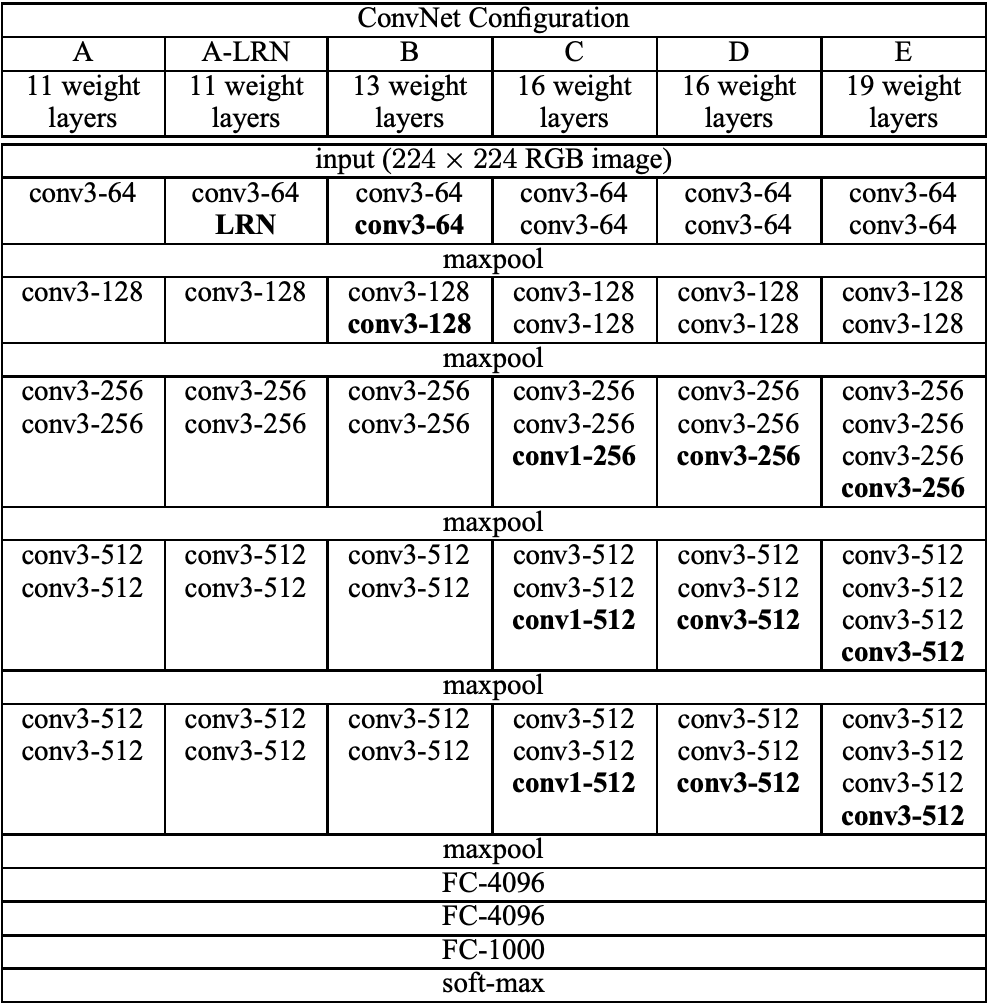

# block선언

In [7]:
def conv_2_block(in_channel, out_channel):
    model = nn.Sequential(
        nn.Conv2d(in_channel, out_channel, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

In [14]:
def conv_3_block(in_channel, out_channel):
    model = nn.Sequential(
        nn.Conv2d(in_channel, out_channel, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

# 모델 구현

In [15]:
class VGG(nn.Module):
    def __init__(self, base_dim, num_classes = 10):
        super(VGG, self).__init__()
        
        self.feature = nn.Sequential(
            conv_2_block(3, base_dim), #64
            conv_2_block(base_dim, 2*base_dim), #128
            conv_3_block(2*base_dim, 4*base_dim), #256
            conv_3_block(4*base_dim, 8*base_dim), #512
            conv_3_block(8*base_dim, 8*base_dim), #512
        )

        self.fc_layer = nn.Sequential(
            #여기서부터는 input에 의해 만들어지는 최종 feature의 개수가 달라진다.
            
            #CIFAR10는 32*32이므로
            #nn.Linear(8*base_dim*1*1, 4096),

            #IAGENET이면 224*224이므로
            nn.Linear(8*base_dim*7*7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1000),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(1000, num_classes),
        )
    
    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

In [16]:
model = VGG(base_dim=64)
predict = model(torch.randn(1, 3,224,224))
print(predict)

tensor([[ 0.0364, -0.0039,  0.0167,  0.0105,  0.0273,  0.0353,  0.0185, -0.0214,
         -0.0098, -0.0159]], grad_fn=<AddmmBackward>)
